In [1]:
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings('ignore')

In [2]:
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
from matplotlib.pylab import rcParams
rcParams['figure.figsize']=20,10

In [4]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler(feature_range=(0,1))

In [5]:
df=pd.read_csv("C:/Users/PRIYANSHU/MJ/TATA.csv")
df.head()

,Date,Open,High,Low,Last,Close,Total Trade Quantity,Turnover (Lacs)
0,2018-10-08,208.00,222.25,206.85,216.00,215.15,4642146.0,10062.83
1,2018-10-05,217.00,218.60,205.90,210.25,209.20,3519515.0,7407.06
2,2018-10-04,223.50,227.80,216.15,217.25,218.20,1728786.0,3815.79
3,2018-10-03,230.00,237.50,225.75,226.45,227.60,1708590.0,3960.27
4,2018-10-01,234.55,234.60,221.05,230.30,230.90,1534749.0,3486.05


In [6]:
df["Date"]=pd.to_datetime(df.Date,format="%Y-%m-%d")
df.index=df['Date']


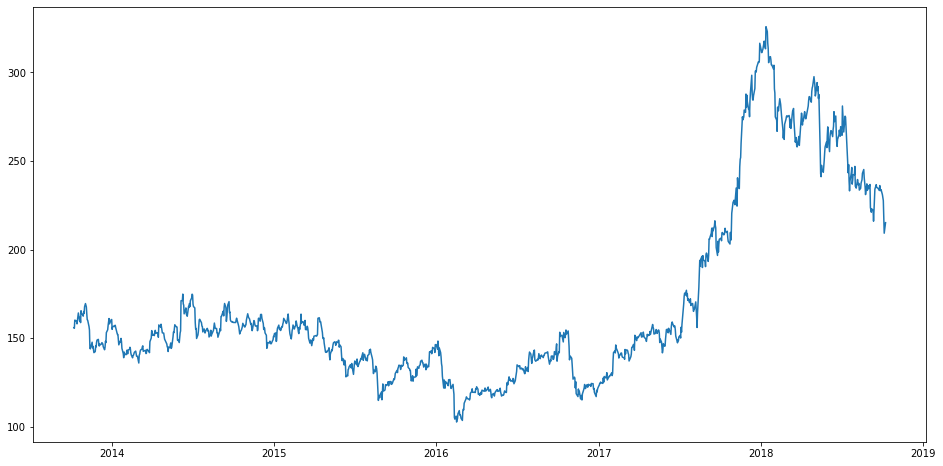

In [7]:
plt.figure(figsize=(16,8))
plt.plot(df["Close"],label='Close Price history')

In [33]:
import seaborn as sns


<AxesSubplot:xlabel='Open'>

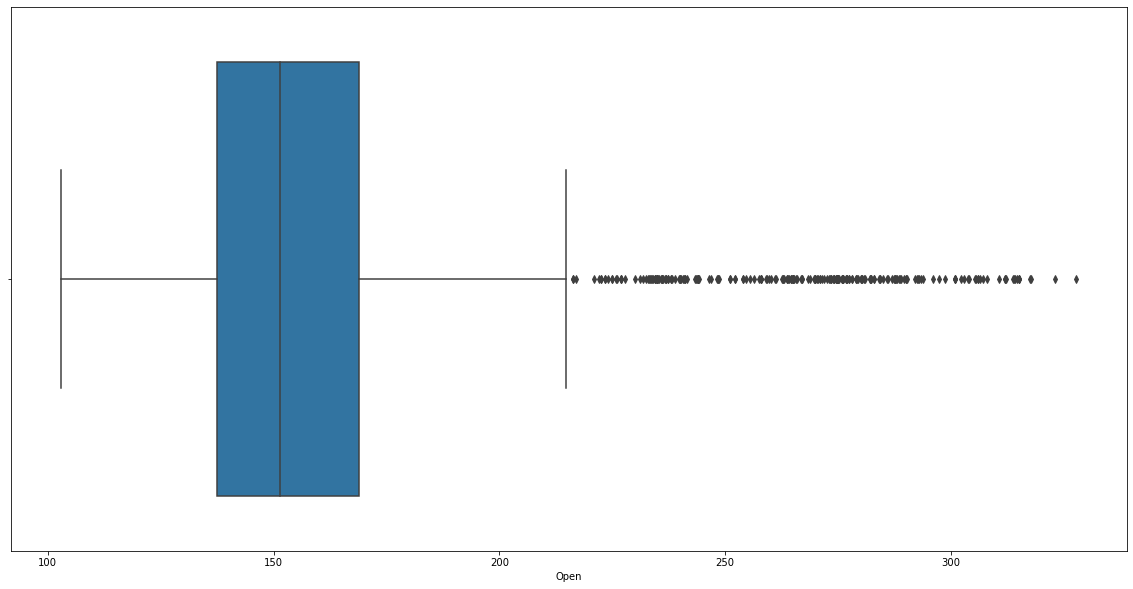

In [34]:
sns.boxplot(x=df['Open'])

<AxesSubplot:>

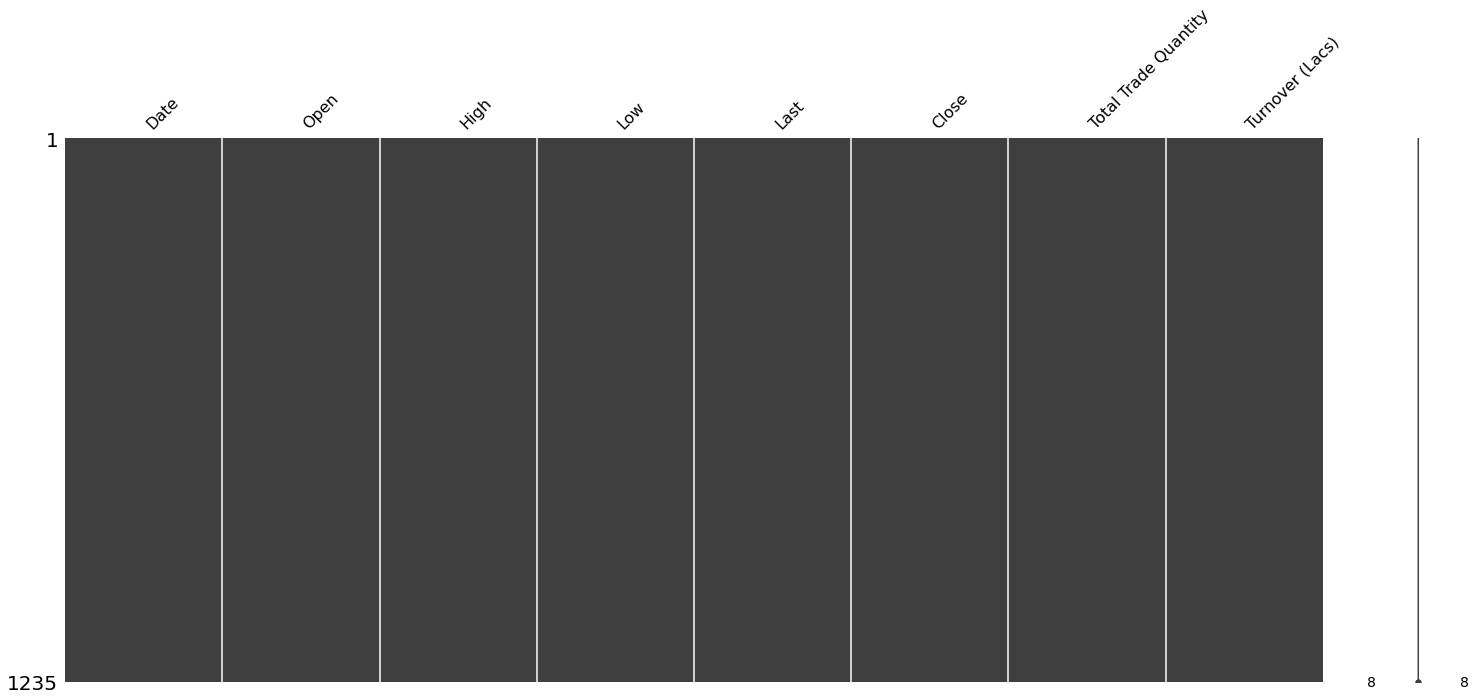

In [38]:
import missingno as msno
msno.matrix(df)

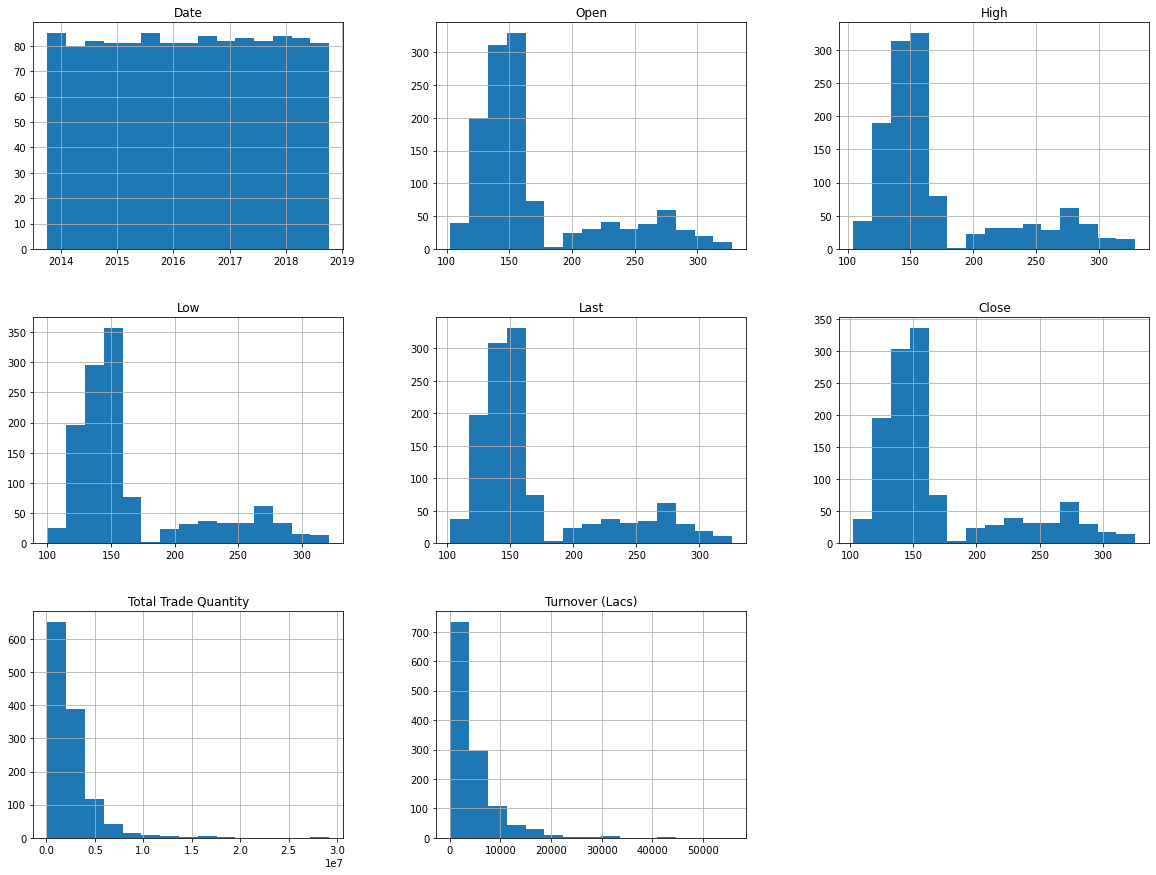

In [39]:
num_bins = 15

df.hist(bins=num_bins, figsize=(20,15))
plt.savefig("histogram_plots")
plt.show()

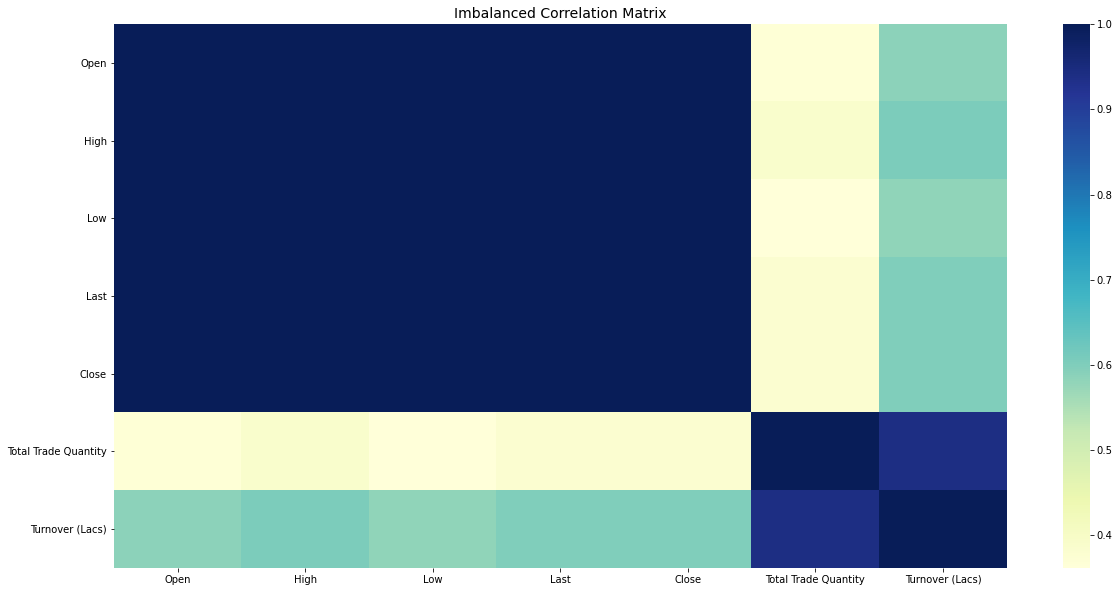

In [40]:
fig, ax = plt.subplots(figsize=(20,10))         
corr = df.corr()
sns.heatmap(corr, cmap='YlGnBu', annot_kws={'size':20}, ax=ax)
ax.set_title("Imbalanced Correlation Matrix", fontsize=14)
plt.show()

<AxesSubplot:xlabel='Open', ylabel='Density'>

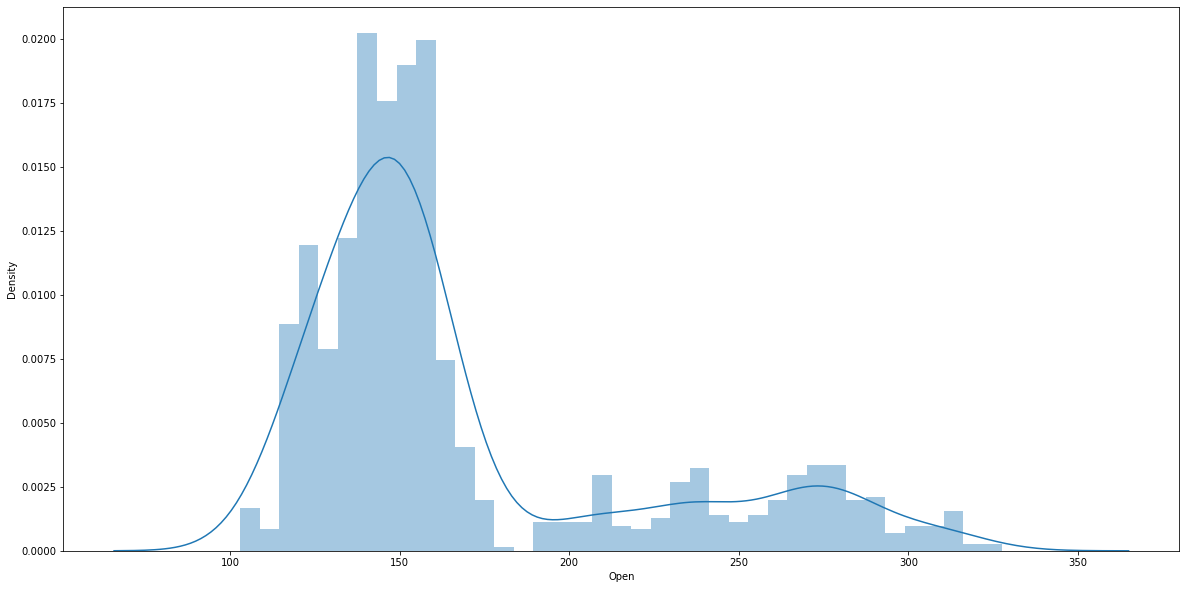

In [41]:
import seaborn as sns
sns.distplot(df.Open)

In [42]:
from keras.models import Sequential
from keras.layers import LSTM,Dropout,Dense

In [9]:
data=df.sort_index(ascending=True,axis=0)
new_dataset=pd.DataFrame(index=range(0,len(df)),columns=['Date','Close'])

In [10]:
for i in range(0,len(data)):
    new_dataset["Date"][i]=data['Date'][i]
    new_dataset["Close"][i]=data["Close"][i]

In [11]:
new_dataset.index=new_dataset.Date
new_dataset.drop("Date",axis=1,inplace=True)

In [12]:
final_dataset=new_dataset.values

In [13]:
train_data=final_dataset[0:987,:]
valid_data=final_dataset[987:,:]

In [14]:
scaler=MinMaxScaler(feature_range=(0,1))
scaled_data=scaler.fit_transform(final_dataset)

In [15]:
x_train_data,y_train_data=[],[]

In [16]:
for i in range(60,len(train_data)):
    x_train_data.append(scaled_data[i-60:i,0])
    y_train_data.append(scaled_data[i,0])

In [17]:
x_train_data,y_train_data=np.array(x_train_data),np.array(y_train_data)

In [18]:
x_train_data=np.reshape(x_train_data,(x_train_data.shape[0],x_train_data.shape[1],1))

In [19]:
lstm_model=Sequential()
lstm_model.add(LSTM(units=50,return_sequences=True,input_shape=(x_train_data.shape[1],1)))
lstm_model.add(LSTM(units=50))
lstm_model.add(Dense(1))

In [20]:
lstm_model.compile(loss='mean_squared_error',optimizer='adam')
lstm_model.fit(x_train_data,y_train_data,epochs=1,batch_size=1,verbose=2)

927/927 - 16s - loss: 9.9745e-04


In [21]:
inputs_data=new_dataset[len(new_dataset)-len(valid_data)-60:].values
inputs_data=inputs_data.reshape(-1,1)
inputs_data=scaler.transform(inputs_data)

In [22]:
X_test=[]
for i in range(60,inputs_data.shape[0]):
    X_test.append(inputs_data[i-60:i,0])
X_test=np.array(X_test)

In [23]:
X_test=np.reshape(X_test,(X_test.shape[0],X_test.shape[1],1))
closing_price=lstm_model.predict(X_test)
closing_price=scaler.inverse_transform(closing_price)

In [24]:
lstm_model.save("saved_lstm_model.h5")

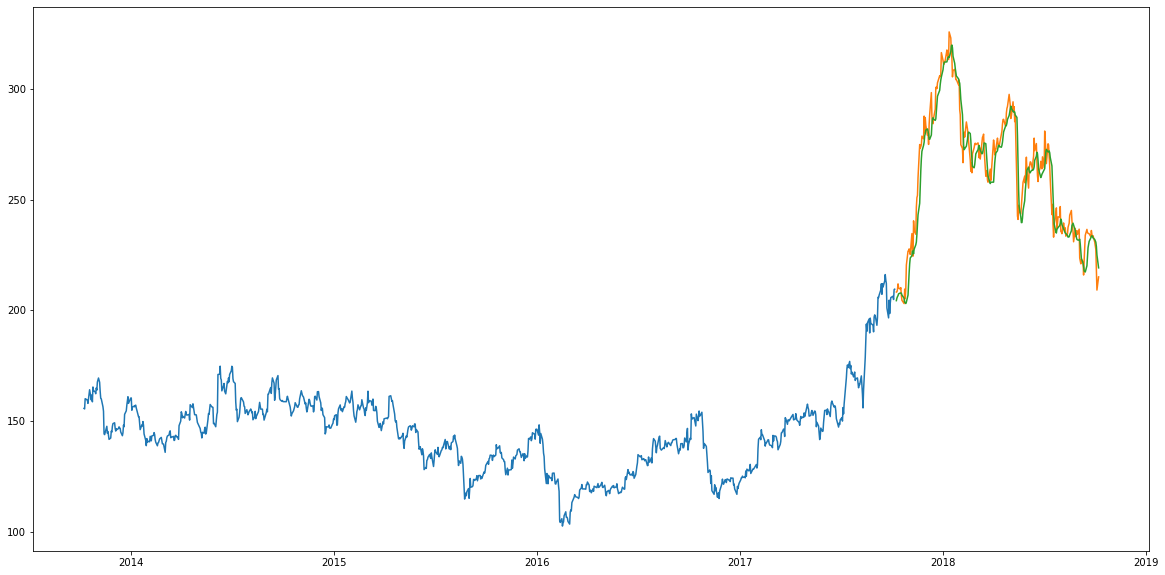

In [25]:
train_data=new_dataset[:987]
valid_data=new_dataset[987:]
valid_data['Predictions']=closing_price
plt.plot(train_data["Close"])
plt.plot(valid_data[['Close',"Predictions"]])